**Library import**

In [40]:
import imageio
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

**Load dataset and show images**

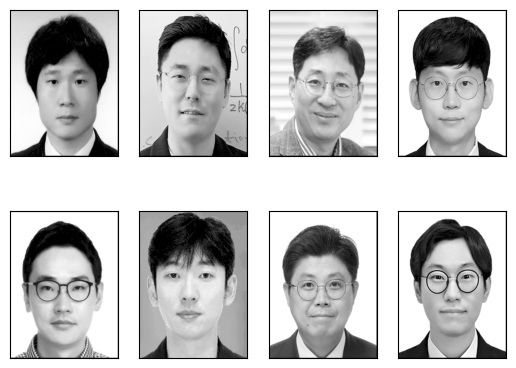

(8, 1360000)


In [41]:
img_res = (1000, 1360)

images = []
images_1D = []

for image_path in glob.glob("pictures/*.png"):
    image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, img_res)
    images.append(image)
    images_1D.append(image.reshape(-1,1))

images = np.array(images)
images_1D = np.array(images_1D)
images_1D = np.squeeze(images_1D, axis=(2,))

fig, axes = plt.subplots(2, 4, # figure객체와 2x4의 plot객체를 각각 할당
                subplot_kw={'xticks': (), 'yticks': ()}) # subplot의 축 설정; x축 눈금없게, y축 눈금없게

for image, ax in zip(images, axes.ravel()): # images, axes.ravel()에서 하나씩 원소 할당
    ax.imshow(image, cmap = 'gray') # imshow로 그림 출력

plt.show() # 그래프 출력

print(images_1D.shape)

**Image Preprocessing**

In [42]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()

scalerX.fit(images_1D)
X_std = scalerX.transform(images_1D)

print(np.mean(X_std, axis=0))
print(np.cov(X_std[:,0],X_std[:,1],ddof=0))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.38777878e-17
 -1.38777878e-17 -1.38777878e-17]
[[0. 0.]
 [0. 0.]]


**Perform PCA and visualize PCs**

[5.56571344e+05 2.41017091e+05 2.34752571e+05 1.76550962e+05
 1.33592076e+05 1.13853046e+05 9.68011943e+04 1.37281557e-22]


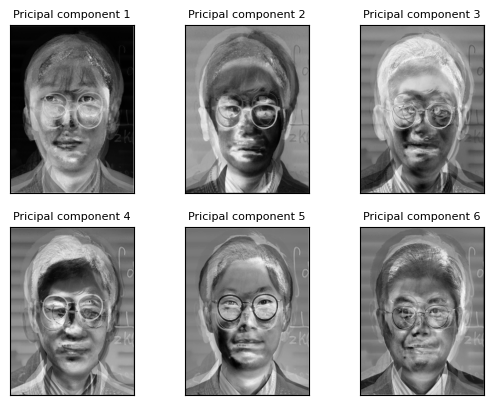

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(X_std)

print(pca.explained_variance_)

loadings = pca.components_

fig, axes = plt.subplots(2, 3, # figure객체와 2x3의 plot객체를 각각 할당
                subplot_kw={'xticks': (), 'yticks': ()}) # subplot의 축 설정; x축 눈굼없게, y축 눈금없게


for i, (image, ax) in enumerate(zip(loadings, axes.ravel())): # images, axes.ravel()에서 하나씩 원소 할당
    pc_image = image.reshape((1360,1000))
    ax.imshow(pc_image, cmap = 'gray') # imshow로 그림 출력
    ax.set_title('Pricipal component {}'.format(i+1)) # image title
    ax.title.set_size(8)

plt.show() # 그래프 출력